# Import Libraries

In [14]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Load Our Dataset

In [15]:

movies_df = pd.read_csv("..//01-Dataset//movies.csv" ,delimiter=';',encoding='ISO-8859-1')
rating_df = pd.read_csv("..//01-Dataset//ratings.csv" ,delimiter=';')
user_df = pd.read_csv("..//01-Dataset//users.csv" ,delimiter=';')


# Explore the Dataset

In [16]:
movies_df.head()

,movieId,title,genres,Unnamed: 3
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [17]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [18]:
user_df.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


# EDA

In [19]:
#Date cleaning
movies_df=movies_df.drop(['Unnamed: 3'] , axis =1)

In [20]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
user_df.duplicated().sum()

0

In [22]:
genres = { "Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama",
    "Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western" }

In [23]:
# remove '|' in the genres column
movies_df['genres'] = movies_df['genres'].str.replace('|',' ')
# count the number of occurences for each genre in the data set
counts = dict()
for i in movies_df.index:
   for g in movies_df.loc[i,'genres'].split(' '):
      if g not in counts:
         if g in genres:
            counts[g] = 1
      else:
         counts[g] = counts[g] + 1

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14252\4172841269.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies_df['genres'] = movies_df['genres'].str.replace('|',' ')


Text(0, 0.5, 'Counts')

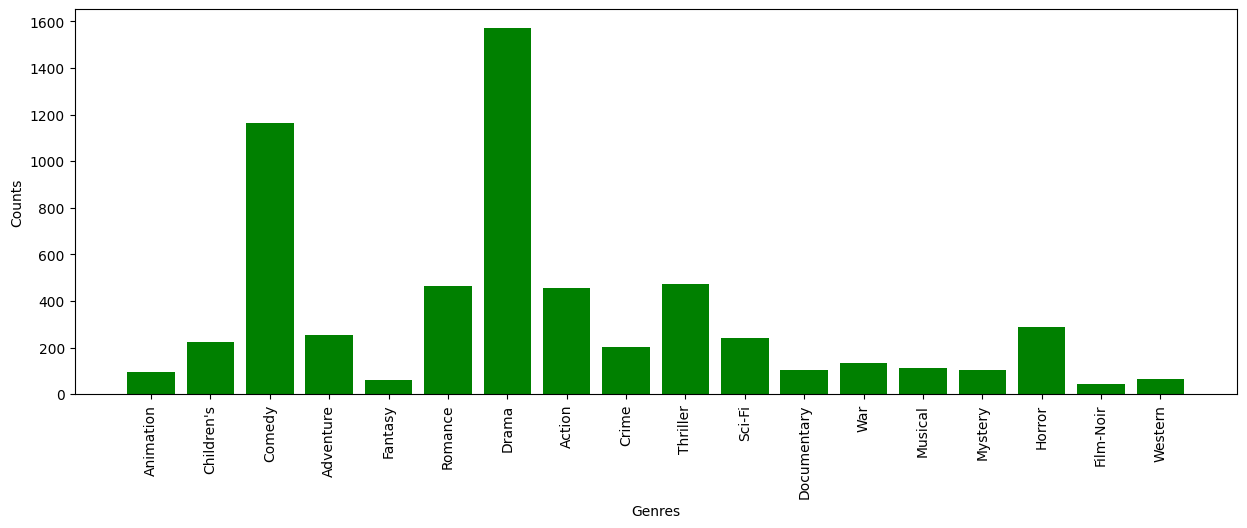

In [24]:
# create a bar chart
plt.figure(figsize=(15,5))
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Counts')

In [25]:
rat_avg ={}
rate_num ={}
for i in range(len(rating_df)):
    if(rating_df['movieId'][i]not in(rat_avg)):
        rat_avg[rating_df['movieId'][i]]=0
        rate_num[rating_df['movieId'][i]]=0
    rat_avg[rating_df['movieId'][i]]+= rating_df['rating'][i]
    rate_num[rating_df['movieId'][i]]+=1

In [ ]:
rate_avg ={}
for i in range(len(movies_df)):
    if(movies_df['movieId'][i] not in rat_avg ):
        rate_avg[movies_df['movieId'][i]] = 0
        movies_df["total_rate"][i]=0
        movies_df["rate sum"][i]=0
        movies_df["rate avg"][i]=0
    else:
        rate_avg[movies_df['movieId'][i]] = rat_avg[movies_df['movieId'][i]] / rate_num[movies_df['movieId'][i]]
        movies_df["total_rate"][i]=rat_avg[movies_df['movieId'][i]]
        movies_df["rate sum"][i]=rate_num[movies_df['movieId'][i]]
        movies_df["rate avg"][i]=rate_avg[movies_df['movieId'][i]]


In [ ]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Animation Children's Comedy
1,2,Jumanji (1995),Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [27]:
movies_df.to_csv("movies.csv",index=False)

In [28]:
rating_df.to_csv("ratings.csv",index=False)

In [29]:
user_df.to_csv("users.csv",index=False)